<a href="https://colab.research.google.com/github/revanthpalla/DeepLearning/blob/main/Cyclesheet03/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Palla Revanth

20MAI0046

GitHub:https://github.com/revanthpalla/DeepLearning.git

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

In [ ]:
# Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

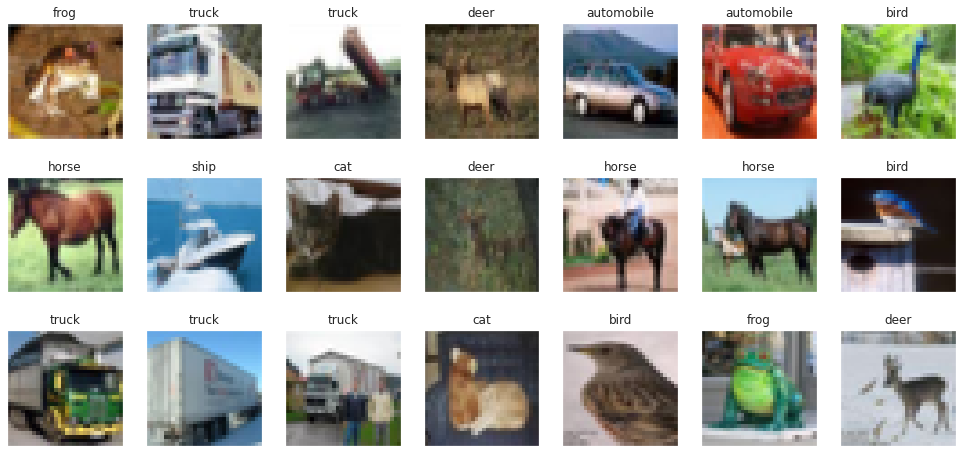

In [ ]:
# Display the first 21 images of X_train
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
# Convert both X_train and X_test to grayscale
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

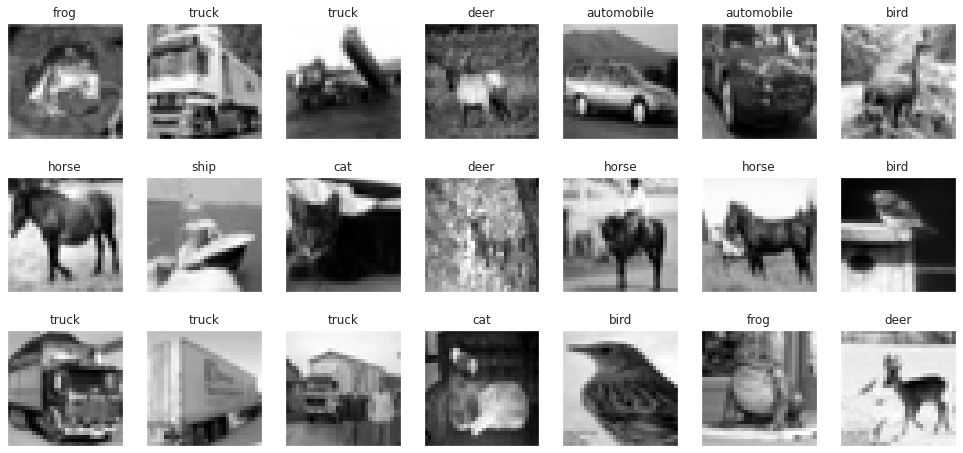

In [ ]:
# Display the first 21 images of X_train (grayscale)
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [ ]:
# Value normalization
X_train  = X_train/255
X_test  = X_test/255

# Label preprocessing
one_hot_encoder = OneHotEncoder(sparse=False)

one_hot_encoder.fit(y_train)

y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [ ]:
# Defining input shape for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

input_shape = (X_train.shape[1], X_train.shape[2], 1)
input_shape

(32, 32, 1)

In [ ]:
# Constructing CNN model
# train the model based on the parameters given in the question
### 1. conv    input: 32,32,1 output: 28,28,6 filter = 5,5 and no of filters = 6
### 2. pooling input: 28,28,6 output: 14,14,6 filter = 2,2 and stride = 2
### 3. conv    input: 14,14,6 output: 10,10,16 filter = 5,5 and no of filters = 16
### 4. pooling input: 10,10,16 output: 5,5,16
### 5. FC      input: 5,5,15   output: 120
### 6. FC      input: 120      output: 84

model = Sequential()
model.add(Conv2D(6, (5, 5), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

Epoch 1/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.9525 - acc: 0.2763 - val_loss: 1.4837 - val_acc: 0.4695
Epoch 2/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.5373 - acc: 0.4496 - val_loss: 1.3330 - val_acc: 0.5297
Epoch 3/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.3990 - acc: 0.5037 - val_loss: 1.2529 - val_acc: 0.5600
Epoch 4/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.3231 - acc: 0.5295 - val_loss: 1.2196 - val_acc: 0.5683
Epoch 5/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2814 - acc: 0.5450 - val_loss: 1.1882 - val_acc: 0.5791


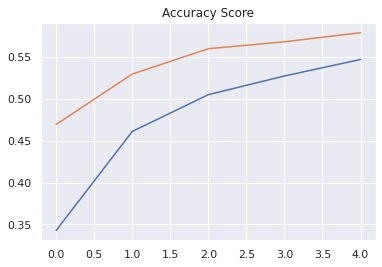

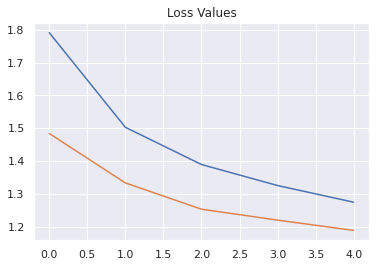

In [ ]:
# Model training
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

# Model evaluation
plt.title('Accuracy Score')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.title('Loss Values')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               123000    
_________________________________________________________________
dropout (Dropout)            (None, 120)               0

In [ ]:
# Predicting test data
predictions = model.predict(X_test)
predictions = one_hot_encoder.inverse_transform(predictions)

y_test = one_hot_encoder.inverse_transform(y_test)

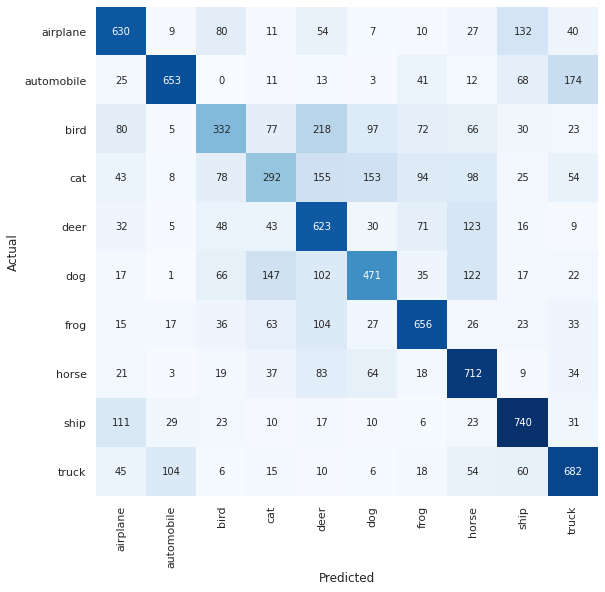

In [ ]:
# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

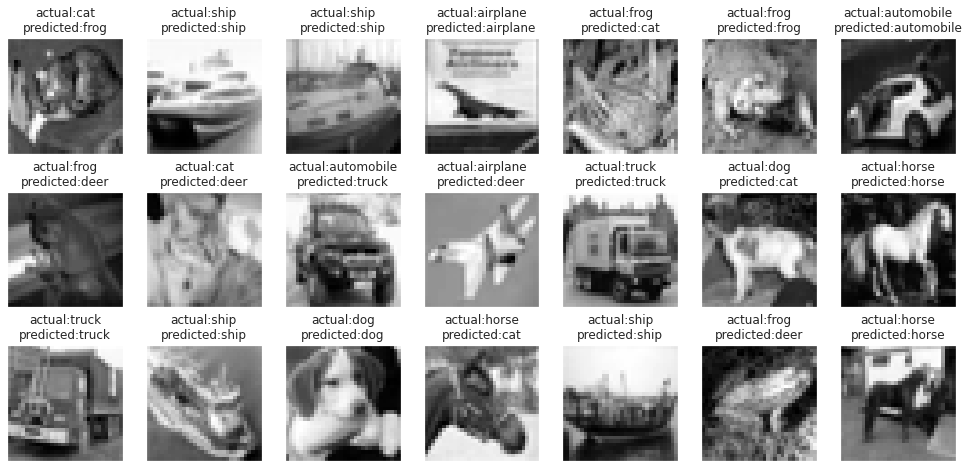

In [ ]:
# Displaying test data with its actual and predicted label
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n' 
                            + 'predicted:' + labels[predictions[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()